In [2]:
from PIL import Image

img = Image.open("bild1.jpg")
img = img.resize((round(img.size[0] / 10), round(img.size[1] / 10)), resample=Image.BICUBIC)

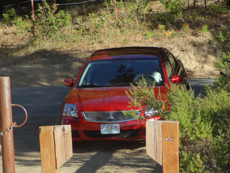

In [3]:
img

In [4]:
img2 = img.crop((0, 0, 60, 60)).resize((32, 32), resample=Image.BICUBIC)

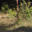

In [5]:
img2

In [9]:
img2.size

(32, 32)

In [6]:
import numpy as np

data = np.asarray(img2).astype(np.float32) / 255.

In [7]:
data

array([[[0.0627451 , 0.05882353, 0.05098039],
        [0.07058824, 0.06666667, 0.05490196],
        [0.06666667, 0.0627451 , 0.05098039],
        ...,
        [0.21176471, 0.1882353 , 0.14117648],
        [0.05490196, 0.05098039, 0.04705882],
        [0.05882353, 0.05882353, 0.05098039]],

       [[0.05490196, 0.05098039, 0.04313726],
        [0.0627451 , 0.05882353, 0.05098039],
        [0.0627451 , 0.05882353, 0.05490196],
        ...,
        [0.25490198, 0.23921569, 0.11372549],
        [0.14117648, 0.1254902 , 0.07450981],
        [0.09019608, 0.08235294, 0.0627451 ]],

       [[0.05098039, 0.04705882, 0.03921569],
        [0.06666667, 0.0627451 , 0.05098039],
        [0.08235294, 0.07450981, 0.0627451 ],
        ...,
        [0.5529412 , 0.4745098 , 0.2784314 ],
        [0.43529412, 0.42352942, 0.2784314 ],
        [0.2784314 , 0.2784314 , 0.23529412]],

       ...,

       [[0.28235295, 0.2509804 , 0.20392157],
        [0.2784314 , 0.24313726, 0.18431373],
        [0.27450982, 0

In [8]:
import keras.models as models

filename = "cardetector.h5"

model = models.load_model(filename)

/Users/jannisseemann/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
print(data.shape)

(32, 32, 3)


In [10]:
model.predict(data.reshape(1, 32, 32, 3))

array([[3.339491e-05]], dtype=float32)

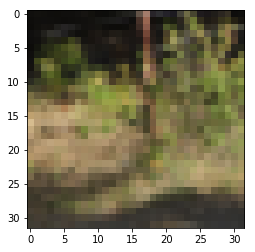

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(data)
plt.show()